In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/Shreyas/Desktop/Jupyter/Datasets/income.csv')

In [5]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [6]:
df.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

Text(0, 0.5, 'Income')

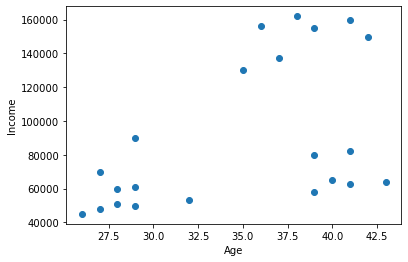

In [7]:
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

K-Means Clustering

In [9]:
km = KMeans(n_clusters=3)

In [10]:
y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [11]:
df['cluster'] = y_pred
df.head(10)

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


cluster_centers_  : Centroid would be calculated for each clusters.

In [12]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [30]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

df3

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
19,Alia,39,80000,2
20,Sid,41,82000,2


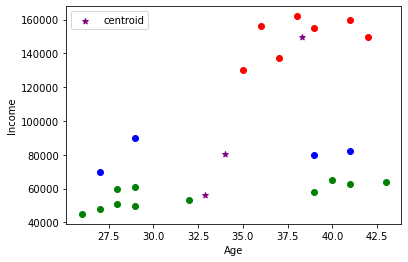

In [31]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['Age'], df1['Income'], color='g')
plt.scatter(df2['Age'], df2['Income'], color='r')
plt.scatter(df3['Age'], df3['Income'], color='b')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker ='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [32]:
scaler = MinMaxScaler()

In [33]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [43]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [44]:
df['cluster'] = y_pred
df.head(10)

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [45]:
km.cluster_centers_

array([[0.78280543, 0.57659435],
       [0.1372549 , 0.11633428]])

In [38]:
#km.inertia_

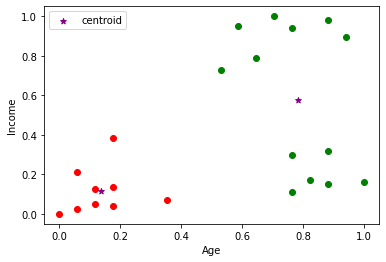

In [46]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['Age'], df1['Income'], color='g')
plt.scatter(df2['Age'], df2['Income'], color='r')
plt.scatter(df3['Age'], df3['Income'], color='b')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker ='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [41]:
### Elbow method

sse = []
k_r = range(1,10)
for k in k_r:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

inertia_   :  Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

Elbow method: The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k.
    As you know, if k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids.
    However, the improvements in average distortion will decline as k increases.
    The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

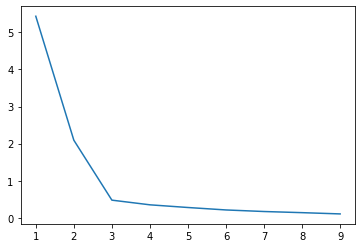

In [42]:
plt.plot(k_r, sse)